# RNN to predict Google stock price

## Part 1 - Data Preprocessing

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

In [4]:
# Importing the training set

dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

In [5]:
# Feature scaling (Normalization)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Creating a data structure with 60 timesteps and 1 output (variation and bisas tradeoff)
# 3 month --> predict --> 1 day

X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train,y_train = np.array(X_train), np.array(y_train)

In [9]:
# reshaping (add a new dimension to array corrsponding to the indicaters)
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN

In [10]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [11]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout
regressor.add(Dropout(0.2))

# Adding the second LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
# Dropout
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
# Dropout
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and Dropout regularization
regressor.add(LSTM(units = 50))
# Dropout
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(1))

# Compiling the RNN
regressor.compile(optimizer = "Adam",
                 loss = "mean_squared_error")

In [12]:
# Fitting the RNN to the training set
regressor.fit(X_train, 
              y_train,
             epochs=100,
             batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0260
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

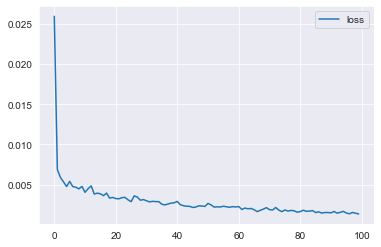

In [13]:
pd.DataFrame(regressor.history.history).plot()

## Part 3 - Making the predictions and visulaization

In [14]:
# Getting the real stock price of 2017

dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

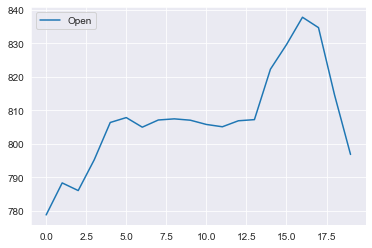

In [15]:
# Trend of real stock price of 2017
dataset_test[["Date", "Open"]].plot()

In [16]:
# Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)

# We want to get the previous 60 financial days' Open of the test set
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

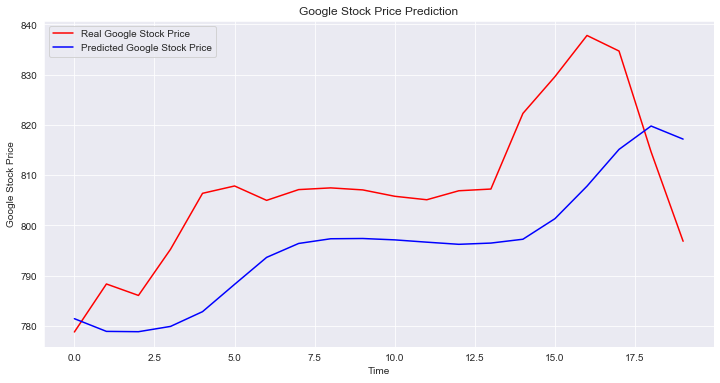

In [19]:
plt.figure(figsize = (12,6))
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()

## Improvement

1. Getting more training data: we trained our model on the past 5 years of the Google Stock Price but it would be even better to train it on the past 10 years.


2. Increasing the number of timesteps: the model remembered the stock prices from the 60 previous financial days to predict the stock price of the next day. That’s because we chose a number of 60 timesteps (3 months). You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).



3. Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one of Google, you could add this other stock price as a new indicator in the training data.



4. Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.



5. Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 50 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.

In [118]:
def rnn_model_improve():
    # Initialising the RNN
    regressor = Sequential()


    regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))


    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.3))


    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.3))


    regressor.add(LSTM(units = 60, return_sequences = True))
    regressor.add(Dropout(0.3))
    
    regressor.add(LSTM(units = 60))
    regressor.add(Dropout(0.2))


    regressor.add(Dense(1))
    
    regressor.compile(optimizer = "adam",
                 loss = "mean_squared_error")
    return regressor

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

In [120]:
# early_stop = EarlyStopping(monitor='loss', mode='min')

In [121]:
# Fitting the RNN to the training set

regressor_improve = rnn_model_improve()
regressor_improve.fit(X_train, 
              y_train,
             epochs=100,
             batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0429
Epoch 2/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0064
Epoch 4/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0057
Epoch 7/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0057
Epoch 8/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [============================

In [122]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)

# We want to get the previous 60 financial days' Open of the test set
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)

X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price_improve = regressor_improve.predict(X_test)
predicted_stock_price_improve = sc.inverse_transform(predicted_stock_price_improve)

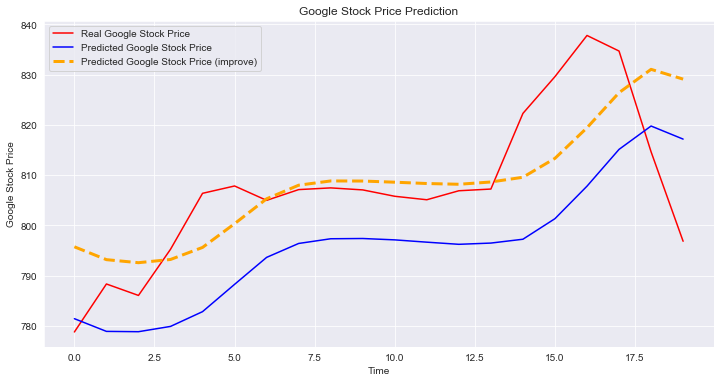

In [136]:
plt.figure(figsize = (12,6))
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.plot(predicted_stock_price_improve, color = "orange", label = "Predicted Google Stock Price (improve)", lw = 3, ls = "--")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()

In [137]:
# Grid Search

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [138]:
def rnn_model(dropout_rate, units, optimizer):
    # Initialising the RNN
    regressor = Sequential()


    regressor.add(LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(dropout_rate))


    regressor.add(LSTM(units = units, return_sequences = True))
    regressor.add(Dropout(dropout_rate))


    regressor.add(LSTM(units = units, return_sequences = True))
    regressor.add(Dropout(dropout_rate))


    regressor.add(LSTM(units = units))
    regressor.add(Dropout(dropout_rate))


    regressor.add(Dense(1))
    
    regressor.compile(optimizer = optimizer,
                 loss = "mean_squared_error")
    return regressor

In [142]:
param_grid = {
    "dropout_rate":[0.2, 0.3, 0.4, 0.5],
    "units":[40,50,60,70],
    "epochs":[100]
}

In [143]:
from keras.wrappers.scikit_learn import KerasRegressor

In [144]:
my_regressor = KerasRegressor(rnn_model, batch_size = 32)

grid_search = GridSearchCV(my_regressor,
                   param_grid = param_grid,
                   scoring='neg_mean_squared_log_error',
                    cv=3
                   )

# grid_search = grid_search.fit(X_train,y_train)
# best_param = grid_search.best_params_

# It takes too long.

In [145]:
# best_param

In [146]:
# # Getting the predicted stock price of 2017

# dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis = 0)

# # We want to get the previous 60 financial days' Open of the test set
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)


# X_test = []
# for i in range(60, 80):
#     X_test.append(inputs[i-60:i,0])
    
# X_test = np.array(X_test)

# X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))

# predicted_stock_price_grid = grid_search.predict(X_test)
# predicted_stock_price_grid = sc.inverse_transform(predicted_stock_price_grid.reshape(-1,1))

In [147]:
# plt.figure(figsize = (12,6))
# plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
# plt.plot(predicted_stock_price_grid, color = "blue", label = "Predicted Google Stock Price After Grid Search")
# plt.title("Google Stock Price Prediction")
# plt.xlabel("Time")
# plt.ylabel("Google Stock Price")
# plt.legend()


# this will give us a better regressor with respect to the lowest RMSE,
# but if we want to predict the trend, we should use previous one with a little layback. 